# ITM

Curso: Visión artificial

Docente: Mateo Rico Garcia


# Clase 08: Detección de bordes

La detección de bordes en una imagen implica métodos matemáticos para encontrar puntos en donde el brillo de las intensidades de los píxeles cambia de forma distinta con respecto a sus vecinos. Podría decirse que los bordes son zonas donde el comportamiento de intensidad de los pixeles entre vecinos cambia abruptamente.

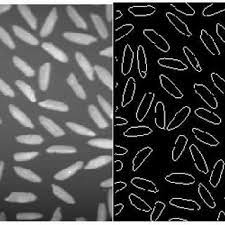

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Detección de bordes por variaciones entre vecinos

Una de las maneras más clásicas de detectar bordes tiene que ver con el calculo de la diferencia entre pixeles vecinos (Derivada). Así, estableciendo un umbral, un usuario podría identificar los bordes.

https://pythoneyes.wordpress.com/2017/07/28/filtros-para-la-deteccion-de-bordes-de-una-imagen-con-python-3-parte-1/

Mostrando imagen de referencia


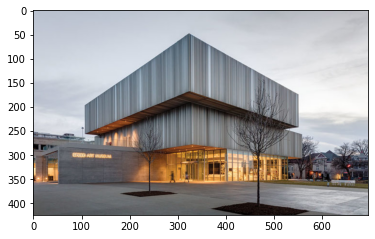

In [14]:
#Algoritmo para detección de bordes
import cv2 # OpenCV para computer vision
import numpy as np # Para cálculo de matrices
import matplotlib.pyplot as plt #Para graficar
import os #Habilita el manejo de directorios

#Leyendo y mostrando imagen  con ruido
Ruta = r'/content/drive/My Drive/1_CLASS/VAR84/07/Arch.jpg'#Ubicación de la imagen desde el google drive
Imagen = cv2.imread(Ruta)#Lee
Imagen=Imagen[:,:,[2,1,0]]#Organiza
print('Mostrando imagen de referencia')
plt.imshow(Imagen.astype('uint8'),vmin=0, vmax=255) #Muestra
plt.show()
print('')

Para detección de bordes, las imágenes se sulenen trabajar en grises normalmente.

Imagen en grises


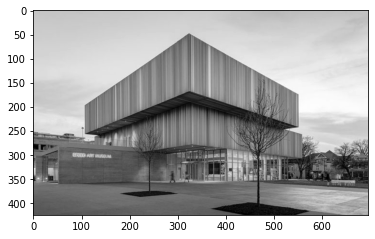

In [15]:
I_Gris=cv2.cvtColor(Imagen, cv2.COLOR_BGR2GRAY)
print('Imagen en grises')
plt.imshow(I_Gris.astype('uint8'),vmin=0, vmax=255,cmap='gray') #Grafica la imagen en campo de grises
plt.show()
print('')

Para este algortimo propongo recorrer la imagen para calcular la diferencia entre un pixel y su vecino.

<ipython-input-16-f1a383e2304d>:9: RuntimeWarning: overflow encountered in ubyte_scalars
  Diferencia=Siguiente-Actual


Resultado


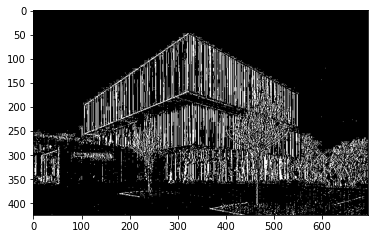

In [16]:
#=============================================================================
[Fl, Cl]=I_Gris.shape #Genera dos variables para almacenar el número de filas y Columnas 
Resultado_1=np.zeros((Fl,Cl))
#recorriendo filas
for i in range(0, Fl, 1):
  for j in range(0, Cl-1, 1):
    Actual=I_Gris[i,j]
    Siguiente=I_Gris[i,j+1]
    Diferencia=Siguiente-Actual
    Diferencia=abs(Diferencia)
    if Diferencia>=200 and Diferencia<=250:
       Resultado_1[i,j]=255
    else:
       Resultado_1[i,j]=0

    
#Mostrando resultados independientes
print('Resultado')
plt.imshow(Resultado_1.astype('uint8'),vmin=0, vmax=255,cmap='gray') #Grafica la imagen en campo de grises
plt.show()
print('')


AL parecer con esta técnica sólo se hace un barrido de los bordes en una dirección, tocaría implementar la tecnica para encontrar bordes en la ubicación vertical.

<ipython-input-17-f40c15aefc3c>:8: RuntimeWarning: overflow encountered in ubyte_scalars
  Diferencia=Siguiente-Actual


Resultado


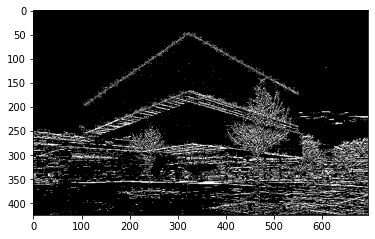

In [17]:
#recorriendo columnas
Diferencia=0
Resultado_2=np.zeros((Fl,Cl))
for j in range(0, Cl, 1):
  for i in range(0, Fl-1, 1):
    Actual=I_Gris[i,j]
    Siguiente=I_Gris[i+1,j]
    Diferencia=Siguiente-Actual
    Diferencia=abs(Diferencia)
    if Diferencia>=200 and Diferencia<=250:
      Resultado_2[i,j]=255
    else:
      Resultado_2[i,j]=0

    
#Mostrando resultados independientes
print('Resultado')
plt.imshow(Resultado_2.astype('uint8'),vmin=0, vmax=255,cmap='gray') #Grafica la imagen en campo de grises
plt.show()
print('')


De los bordes en ambas direcciones se podría armar una matriz de bordes resultantes utilizando el teorema de pitágoras.

Resultado


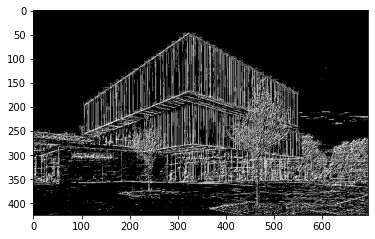

In [18]:
#recorriendo columnas
from math import sqrt
Resultado_3=np.zeros((Fl,Cl))
for i in range(0, Fl, 1):
  for j in range(0, Cl, 1):
    Resultado_3[i,j]=sqrt(Resultado_1[i,j]**2+Resultado_2[i,j]**2)

Resultado_3=cv2.normalize(Resultado_3, Resultado_3, 0, 255, norm_type=cv2.NORM_MINMAX)   

    
#Mostrando resultados independientes
print('Resultado')
plt.imshow(Resultado_3.astype('uint8'),vmin=0, vmax=255,cmap='gray') #Grafica la imagen en campo de grises
plt.show()
print('')


# 2. Detección de bordes por filtros espaciales

Existen kernels que identifican las regiones con diferencias entre píxeles entre esos Prewitt y Sobel.

## El operador Prewitt utiliza kernels para las diferencias verticales y horizontales como:

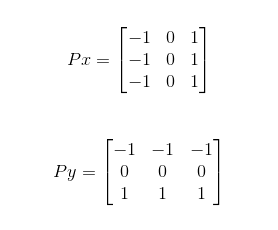

Y el cálculo de la resultante se realiza como:

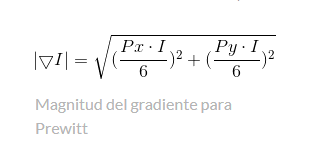

Mostrando imagen de referencia


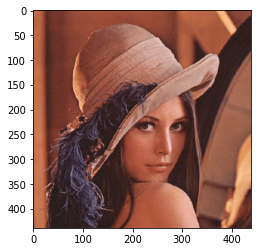

In [ ]:
#Algoritmo para detección de bordes
import cv2 # OpenCV para computer vision
import numpy as np # Para cálculo de matrices
import matplotlib.pyplot as plt #Para graficar
import os #Habilita el manejo de directorios

#Leyendo y mostrando imagen  con ruido
Ruta = r'/content/drive/My Drive/1_CLASS/ET0158/Notebooks/08/Lena.png'#Ubicación de la imagen desde el google drive
Imagen = cv2.imread(Ruta)#Lee
Imagen=Imagen[:,:,[2,1,0]]#Organiza
print('Mostrando imagen de referencia')
plt.imshow(Imagen.astype('uint8'),vmin=0, vmax=255) #Muestra
plt.show()
print('')

Imagen en grises


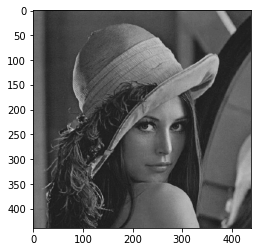

In [ ]:
I_Gris=cv2.cvtColor(Imagen, cv2.COLOR_BGR2GRAY)
print('Imagen en grises')
plt.imshow(I_Gris.astype('uint8'),vmin=0, vmax=255,cmap='gray') #Grafica la imagen en campo de grises
plt.show()
print('')

Resultado X


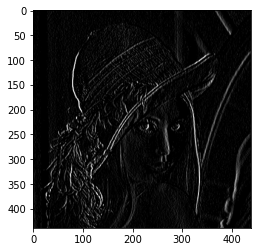


Resultado X2


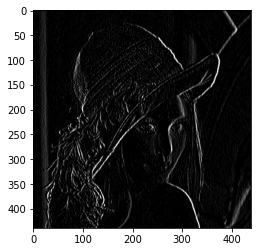


Resultado Y


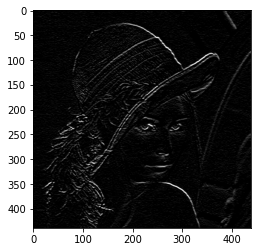


Resultado Y2


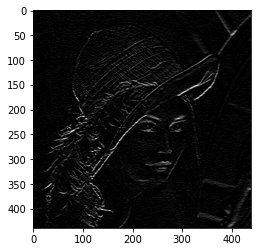


Resultado final


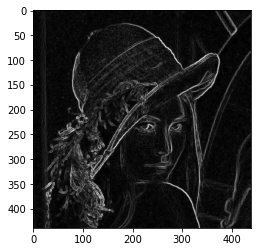

In [ ]:
#Detectando bordes Prewitt
from math import sqrt
[Fl, Cl]=I_Gris.shape #Genera dos variables para almacenar el número de filas y Columnas 
Resultado_X=np.zeros((Fl,Cl))
Resultado_Y=np.zeros((Fl,Cl))
Resultado_X2=np.zeros((Fl,Cl))
Resultado_Y2=np.zeros((Fl,Cl))

Resultado_Total=np.zeros((Fl,Cl))
#Crea kernels Prewitt manualmente
kernel_x = np.array(([-1,0,1],[-1,0,1],[-1,0,1]),dtype='float')
kernel_y = np.array(([-1,-1,-1],[0,0,0],[1,1,1]),dtype='float')
kernel_x2 = np.array(([1,0,-1],[1,0,-1],[1,0,-1]),dtype='float')
kernel_y2 = np.array(([1,1,1],[0,0,0],[-1,-1,-1]),dtype='float')


#Corriendo filtros
Resultado_X = cv2.filter2D(I_Gris,-1,kernel_x)
Resultado_Y = cv2.filter2D(I_Gris,-1,kernel_y)
Resultado_X2 = cv2.filter2D(I_Gris,-1,kernel_x2)
Resultado_Y2 = cv2.filter2D(I_Gris,-1,kernel_y2)


#Mostrando resultados independientes
print('Resultado X')
plt.imshow(Resultado_X.astype('uint8'),vmin=0, vmax=255,cmap='gray') #Grafica la imagen en campo de grises
plt.show()
print('')

#Mostrando resultados independientes
print('Resultado X2')
plt.imshow(Resultado_X2.astype('uint8'),vmin=0, vmax=255,cmap='gray') #Grafica la imagen en campo de grises
plt.show()
print('')

#Mostrando resultados independientes
print('Resultado Y')
plt.imshow(Resultado_Y.astype('uint8'),vmin=0, vmax=255,cmap='gray') #Grafica la imagen en campo de grises
plt.show()
print('')

#Mostrando resultados independientes
print('Resultado Y2')
plt.imshow(Resultado_Y2.astype('uint8'),vmin=0, vmax=255,cmap='gray') #Grafica la imagen en campo de grises
plt.show()
print('')


# Calculando resultado total
for i in range(0, Fl, 1):
  for j in range(0, Cl, 1):
    Resultado_Total[i,j]=sqrt((Resultado_X[i,j]/6)**2+(Resultado_Y[i,j]/6)**2+(Resultado_X2[i,j]/6)**2+(Resultado_Y2[i,j]/6)**2)

# Normalizando resultados
Resultado_Total=cv2.normalize(Resultado_Total, Resultado_Total, 0, 255, norm_type=cv2.NORM_MINMAX)  

#Mostrando resultados independientes
print('Resultado final')
plt.imshow(Resultado_Total.astype('uint8'),vmin=0, vmax=255,cmap='gray') #Grafica la imagen en campo de grises
plt.show()
print('')

## El operador Sobel utiliza kernels para las diferencias verticales y horizontales como:

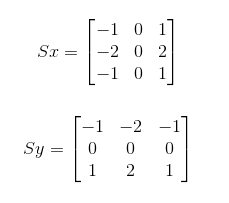

Y el cálculo de la resultante se realiza como:



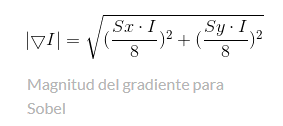

Mostrando imagen de referencia


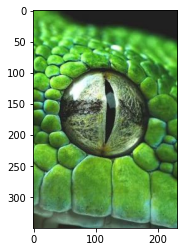

In [ ]:
#Algoritmo para detección de bordes
import cv2 # OpenCV para computer vision
import numpy as np # Para cálculo de matrices
import matplotlib.pyplot as plt #Para graficar
import os #Habilita el manejo de directorios

#Leyendo y mostrando imagen  con ruido
Ruta = r'/content/drive/My Drive/1_CLASS/ET0158/Notebooks/08/Serpiente.jpg'#Ubicación de la imagen desde el google drive
Imagen = cv2.imread(Ruta)#Lee
Imagen=Imagen[:,:,[2,1,0]]#Organiza
print('Mostrando imagen de referencia')
plt.imshow(Imagen.astype('uint8'),vmin=0, vmax=255) #Muestra
plt.show()
print('')

Imagen en grises


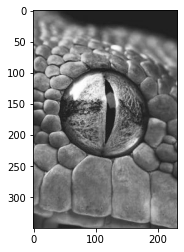

In [ ]:
I_Gris=cv2.cvtColor(Imagen, cv2.COLOR_BGR2GRAY)
print('Imagen en grises')
plt.imshow(I_Gris.astype('uint8'),vmin=0, vmax=255,cmap='gray') #Grafica la imagen en campo de grises
plt.show()
print('')

Resultado X


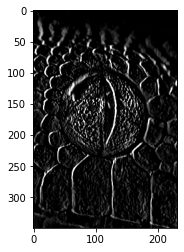


Resultado X2


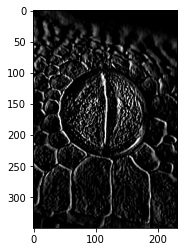


Resultado Y


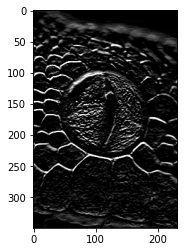


Resultado Y2


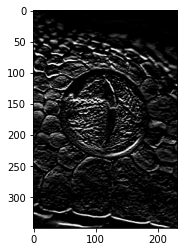


Resultado final


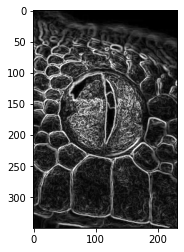

In [ ]:
#Detectando bordes Sobel
from math import sqrt
[Fl, Cl]=I_Gris.shape #Genera dos variables para almacenar el número de filas y Columnas 
Resultado_X=np.zeros((Fl,Cl))
Resultado_Y=np.zeros((Fl,Cl))
Resultado_X2=np.zeros((Fl,Cl))
Resultado_Y2=np.zeros((Fl,Cl))
Resultado_Total=np.zeros((Fl,Cl))

#Crea kernels Sobel manualmente
kernel_x = np.array(([-1,0,1],[-2,0,2],[-1,0,1]),dtype='float')
kernel_y = np.array(([-1,-2,-1],[0,0,0],[1,2,1]),dtype='float')
kernel_x2 = np.array(([1,0,-1],[2,0,-2],[1,0,-1]),dtype='float')
kernel_y2 = np.array(([1,2,1],[0,0,0],[-1,-2,-1]),dtype='float')

#Corriendo filtros
Resultado_X = cv2.filter2D(I_Gris,-1,kernel_x)
Resultado_Y = cv2.filter2D(I_Gris,-1,kernel_y)
Resultado_X2 = cv2.filter2D(I_Gris,-1,kernel_x2)
Resultado_Y2 = cv2.filter2D(I_Gris,-1,kernel_y2)

#Mostrando resultados independientes
print('Resultado X')
plt.imshow(Resultado_X.astype('uint8'),vmin=0, vmax=255,cmap='gray') #Grafica la imagen en campo de grises
plt.show()
print('')

#Mostrando resultados independientes
print('Resultado X2')
plt.imshow(Resultado_X2.astype('uint8'),vmin=0, vmax=255,cmap='gray') #Grafica la imagen en campo de grises
plt.show()
print('')

#Mostrando resultados independientes
print('Resultado Y')
plt.imshow(Resultado_Y.astype('uint8'),vmin=0, vmax=255,cmap='gray') #Grafica la imagen en campo de grises
plt.show()
print('')

#Mostrando resultados independientes
print('Resultado Y2')
plt.imshow(Resultado_Y2.astype('uint8'),vmin=0, vmax=255,cmap='gray') #Grafica la imagen en campo de grises
plt.show()
print('')

# Calculando resultado total
for i in range(0, Fl, 1):
  for j in range(0, Cl, 1):
    Resultado_Total[i,j]=sqrt((Resultado_X[i,j]/8)**2+(Resultado_Y[i,j]/8)**2+(Resultado_X2[i,j]/8)**2+(Resultado_Y2[i,j]/8)**2)

# Normalizando resultados
Resultado_Total=cv2.normalize(Resultado_Total, Resultado_Total, 0, 255, norm_type=cv2.NORM_MINMAX)  

#Mostrando resultados independientes
print('Resultado final')
plt.imshow(Resultado_Total.astype('uint8'),vmin=0, vmax=255,cmap='gray') #Grafica la imagen en campo de grises
plt.show()
print('')

Algunas referencias:

https://es.acervolima.com/2021/02/09/programa-python-para-detectar-los-bordes-de-una-imagen-usando-opencv-metodo-de-deteccion-de-bordes-sobel/

https://programarfacil.com/blog/vision-artificial/detector-de-bordes-canny-opencv/

https://pythoneyes.wordpress.com/2017/07/28/filtros-para-la-deteccion-de-bordes-de-una-imagen-con-python-3-parte-2/


# 3. Detección de bordes con funciones de Opencv

Mostrando imagen de referencia


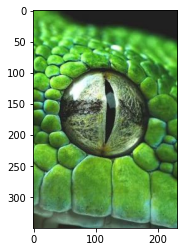

In [ ]:
#Algoritmo para detección de bordes
import cv2 # OpenCV para computer vision
import numpy as np # Para cálculo de matrices
import matplotlib.pyplot as plt #Para graficar
import os #Habilita el manejo de directorios

#Leyendo y mostrando imagen  con ruido
Ruta = r'/content/drive/My Drive/1_CLASS/ET0158/Notebooks/08/Serpiente.jpg'#Ubicación de la imagen desde el google drive
Imagen = cv2.imread(Ruta)#Lee
Imagen=Imagen[:,:,[2,1,0]]#Organiza
print('Mostrando imagen de referencia')
plt.imshow(Imagen.astype('uint8'),vmin=0, vmax=255) #Muestra
plt.show()
print('')

Imagen en grises


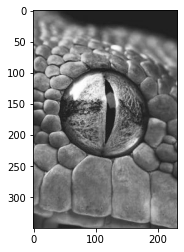

In [ ]:
I_Gris=cv2.cvtColor(Imagen, cv2.COLOR_BGR2GRAY)
print('Imagen en grises')
plt.imshow(I_Gris.astype('uint8'),vmin=0, vmax=255,cmap='gray') #Grafica la imagen en campo de grises
plt.show()
print('')

Resultado X


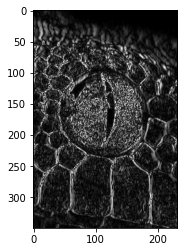


Resultado Y


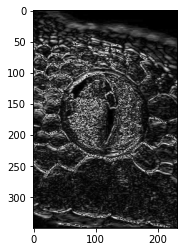


Resultado final


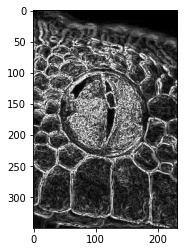

In [ ]:
sobelX = cv2.Sobel(I_Gris,cv2.CV_64F,1,0)#x gradiente de dirección
sobelY = cv2.Sobel(I_Gris,cv2.CV_64F,0,1)#y gradiente de dirección
 
sobelX = np.uint8(np.absolute(sobelX))#x valor absoluto
sobelY = np.uint8(np.absolute(sobelY))#y valor absoluto

print('Resultado X')
plt.imshow(sobelX.astype('uint8'),vmin=0, vmax=255,cmap='gray') #Grafica la imagen en campo de grises
plt.show()
print('')

#Mostrando resultados independientes
print('Resultado Y')
plt.imshow(sobelY.astype('uint8'),vmin=0, vmax=255,cmap='gray') #Grafica la imagen en campo de grises
plt.show()
print('')

sobelTotal = cv2.bitwise_or(sobelX,sobelY)#
print('Resultado final')
plt.imshow(sobelTotal.astype('uint8'),vmin=0, vmax=255,cmap='gray') #Grafica la imagen en campo de grises
plt.show()
print('')


El detector de bordes Canny

Mostrando imagen de referencia


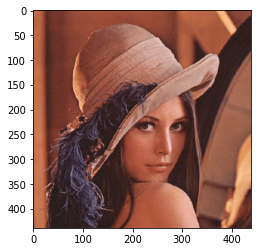

In [ ]:
#Algoritmo para detección de bordes
import cv2 # OpenCV para computer vision
import numpy as np # Para cálculo de matrices
import matplotlib.pyplot as plt #Para graficar
import os #Habilita el manejo de directorios

#Leyendo y mostrando imagen  con ruido
Ruta = r'/content/drive/My Drive/1_CLASS/ET0158/Notebooks/08/Lena.png'#Ubicación de la imagen desde el google drive
Imagen = cv2.imread(Ruta)#Lee
Imagen=Imagen[:,:,[2,1,0]]#Organiza
print('Mostrando imagen de referencia')
plt.imshow(Imagen.astype('uint8'),vmin=0, vmax=255) #Muestra
plt.show()
print('')

Imagen en grises


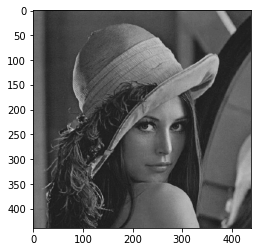

In [ ]:
I_Gris=cv2.cvtColor(Imagen, cv2.COLOR_BGR2GRAY)
print('Imagen en grises')
plt.imshow(I_Gris.astype('uint8'),vmin=0, vmax=255,cmap='gray') #Grafica la imagen en campo de grises
plt.show()
print('')

Resultado Canny


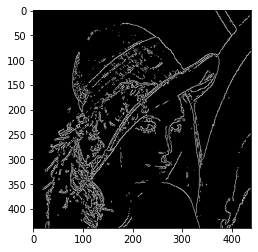

In [ ]:
Resultado_Canny = cv2.Canny(I_Gris,130,150)# 130 diferencia mínima, 140 es diferencia màxima

print('Resultado Canny')
plt.imshow(Resultado_Canny.astype('uint8'),vmin=0, vmax=255,cmap='gray') #Grafica la imagen en campo de grises
plt.show()
print('')


# Actividad

1. Realice una estrategia para extraer los bordes canal por canal en en una imagen a color. Pruebe en las imágenes de la clase y en una colección propuesta por usted.

2. Realice un algoritmo que sobreponga los bordes encontrados en la actividad anterior, sobre la imagen original utilizada. Como se muestra en el siguiente ejemplo.

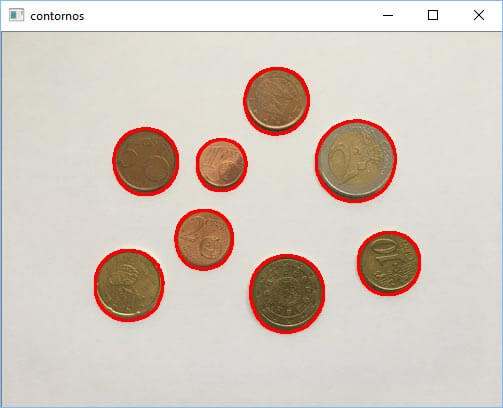